<a href="https://colab.research.google.com/github/Arshiya109/Airline-Ticket-Prediction-Analysis/blob/main/PDS_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      SR._NO.   AIRLINES FLIGHT_NO. SOURCE_CITY DEPARTURE_TIME STOPS  \
0           0   SpiceJet    SG-8709       Delhi        Evening  zero   
1           1   SpiceJet    SG-8157       Delhi  Early_Morning  zero   
2           2    AirAsia     I5-764       Delhi  Early_Morning  zero   
3           3    Vistara     UK-995       Delhi        Morning  zero   
4           4    Vistara     UK-963       Delhi        Morning  zero   
...       ...        ...        ...         ...            ...   ...   
2025     2025    Vistara     UK-801       Delhi        Morning   one   
2026     2026    Vistara     UK-807       Delhi          Night   one   
2027     2027    Vistara     UK-815       Delhi        Morning   one   
2028     2028  Air_India     AI-839       Delhi          Night   one   
2029     2029  Air_India     AI-479       Delhi          Night   one   

       ARRIVAL_TIME DESTINATION_CITY    CLASS  DURATION  DAYS_LEFT  PRICE  
0             Night           Mumbai  Economy      2.17    

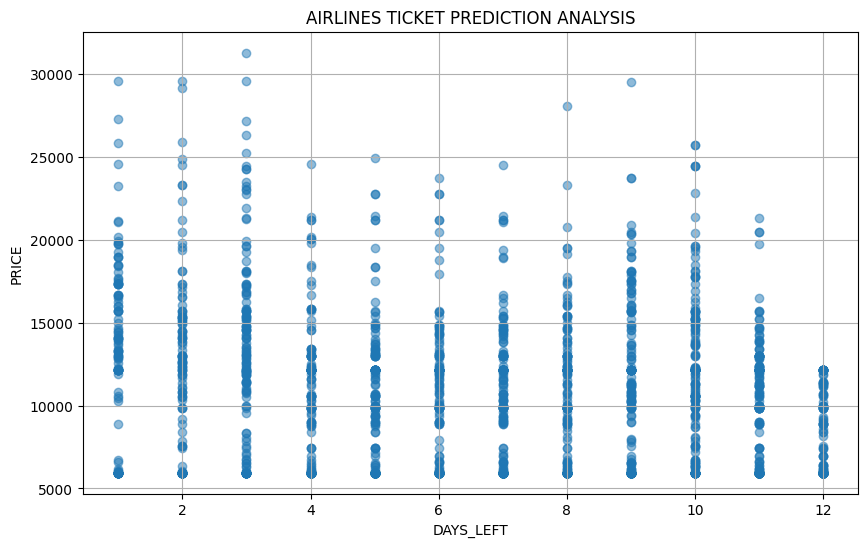

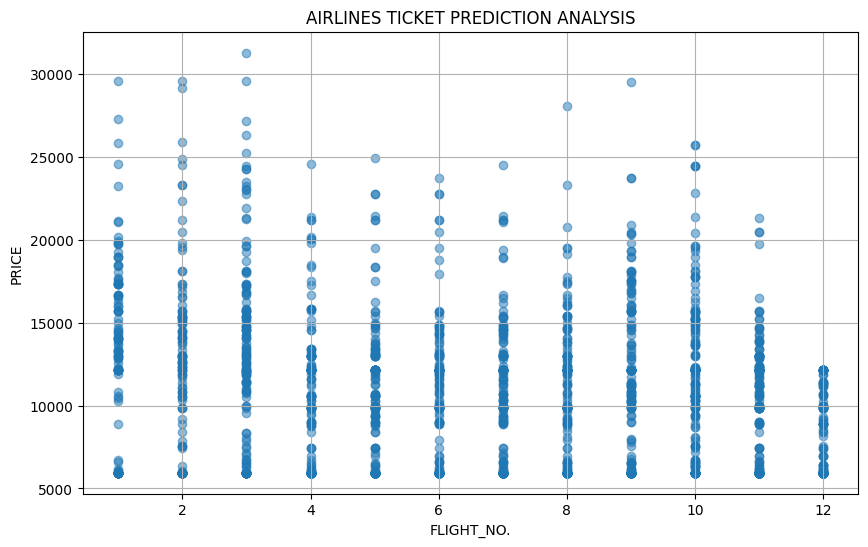

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/AIRLINES DATASET PRACTICAL - Sheet1.csv')
print(data)

x_column = 'DAYS_LEFT'
y_column = 'PRICE'

plt.figure(figsize=(10, 6))
plt.scatter(data[x_column], data[y_column], alpha=0.5)
plt.title('AIRLINES TICKET PREDICTION ANALYSIS')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)

plt.show()


x1_column = 'FLIGHT_NO.'
y1_column = 'PRICE'

plt.figure(figsize=(10, 6))
plt.scatter(data[x_column], data[y_column], alpha=0.5)
plt.title('AIRLINES TICKET PREDICTION ANALYSIS')
plt.xlabel(x1_column)
plt.ylabel(y1_column)
plt.grid(True)

plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load your airline ticket dataset
data = pd.read_csv('/content/AIRLINES DATASET PRACTICAL - Sheet1.csv')

# Apply label encoding to categorical features
label_encoders = {}
categorical_columns = ['AIRLINES', 'SOURCE_CITY', 'DEPARTURE_TIME', 'STOPS', 'ARRIVAL_TIME', 'DESTINATION_CITY', 'CLASS', 'DURATION', 'DAYS_LEFT']

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define your features (independent variables) and target (ticket price)
X = data[['AIRLINES', 'SOURCE_CITY', 'DEPARTURE_TIME', 'STOPS', 'ARRIVAL_TIME', 'DESTINATION_CITY', 'CLASS', 'DURATION', 'DAYS_LEFT']]
y = data['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print('\n')
print("R-squared:", r2)
print('\n')

# Now, you can use this trained model to make predictions on new data

# For example, let's predict the ticket price for a new flight
new_flight_features = [label_encoders['AIRLINES'].transform(['Vistara'])[0],
                        label_encoders['SOURCE_CITY'].transform(['Delhi'])[0],
                        label_encoders['DEPARTURE_TIME'].transform(['Morning'])[0],
                        label_encoders['STOPS'].transform(['one'])[0],
                        label_encoders['ARRIVAL_TIME'].transform(['Night'])[0],
                        label_encoders['DESTINATION_CITY'].transform(['Mumbai'])[0],
                        label_encoders['CLASS'].transform(['Economy'])[0],
                        label_encoders['DURATION'].transform(['2.17'])[0],
                        label_encoders['DAYS_LEFT'].transform(['1'])[0]]

predicted_price = model.predict([new_flight_features])
print('\n')
print("Predicted Ticket Price:", predicted_price)
print('\n')


Mean Squared Error: 10628920.452600291


R-squared: 0.42666611441033697




Predicted Ticket Price: [13660.42806159]




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
